In [5]:
import matplotlib.pyplot as plt
import numpy as np

import hypernetx as hnx
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence)

<module 'hypernetx.drawing.draw_incidence' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_incidence.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [6]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

# Visualization

## UpSet Visualization

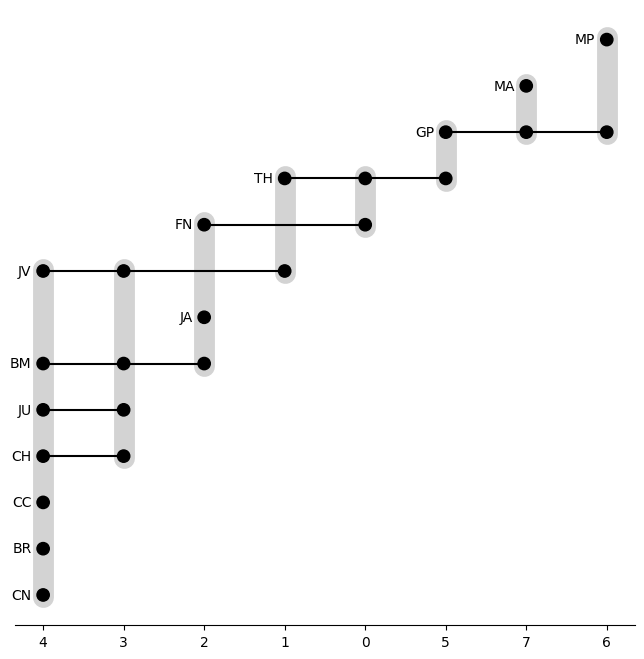

In [7]:
draw_incidence.draw_incidence_upset(H)

## Advanced Visualization Parameters

### Color
Pass in a function to assign node/edge colors and set the order of the edges. 

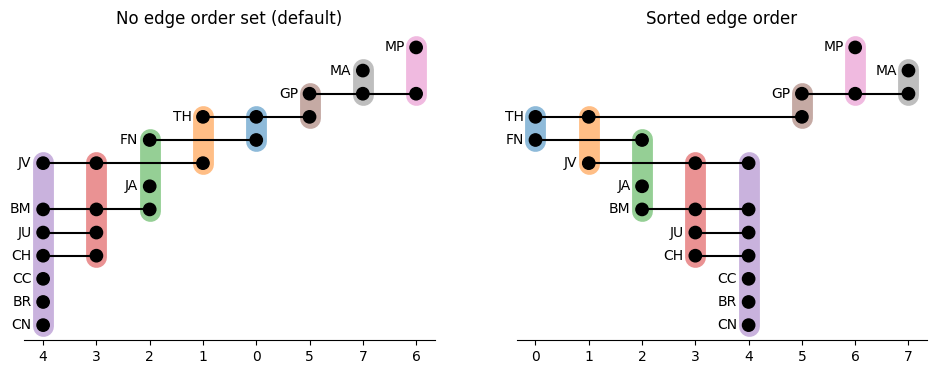

In [54]:
edge_color = lambda e: plt.cm.tab10(e)
lighter_edge_color = lambda e: edge_color(e) + np.array([0, 0, 0, -.5])

kwargs = {
    'edges_kwargs': {
        'edgecolors': edge_color,
        'facecolors': lighter_edge_color,
        'color': lighter_edge_color
    }
}
plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.title('No edge order set (default)')
draw_incidence.draw_incidence_upset(
    H,
    **kwargs
)
plt.subplot(132)
plt.title('Sorted edge order')
draw_incidence.draw_incidence_upset(
    H,
    edge_order = sorted(H.edges),
    **kwargs
)



### Font
Font attributes can be individually set by passing in a dictionary mapping nodes to values

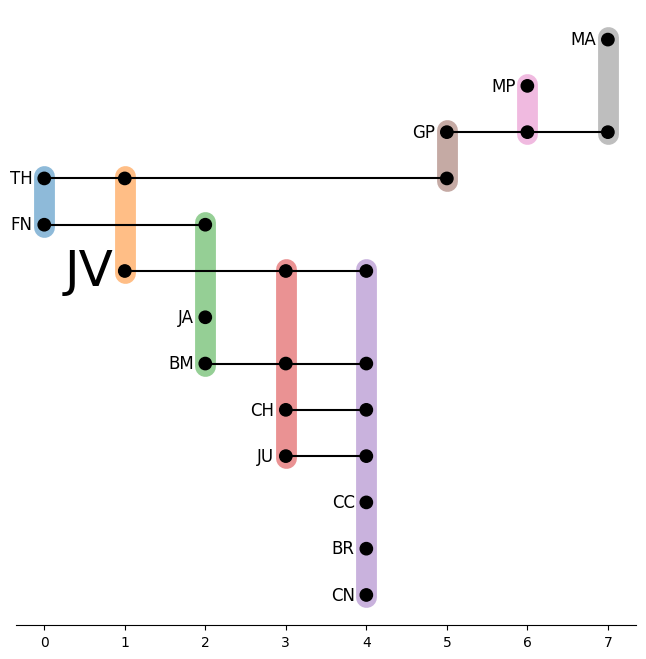

In [32]:
node_labels_kwargs={
    'fontsize': lambda v: 36 if v == 'JV' else 12
}

draw_incidence.draw_incidence_upset(
    H,
    edge_order = sorted(H.edges),
    node_labels_on_axis=False, node_labels_kwargs=node_labels_kwargs,
    **kwargs
)

### Label locations
Set `node_labels_on_axis` to *True* to view node labels on the vertical axis instead of beside the nodes. (The node labels are located beside the nodes by default.)

Set `edge_labels_on_axis` to *False* to see edge labels below the edges instead of on the horizontal axis.  (The edge labels are placed on the axis by default.)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


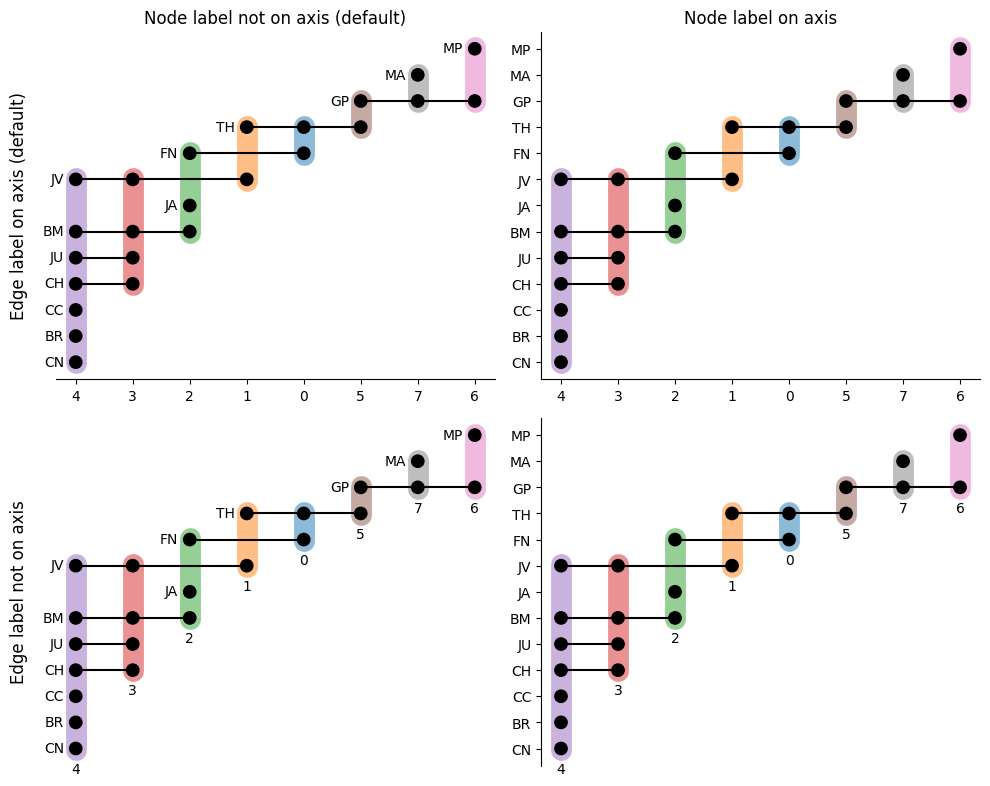

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1) 
draw_incidence.draw_incidence_upset(
    H,
    **kwargs
)

plt.title('Node label not on axis (default)')
plt.ylabel("Edge label on axis (default)", rotation=90, fontsize=12, labelpad=20)  # 90 degrees is vertical

plt.subplot(2, 2, 2)
draw_incidence.draw_incidence_upset(
    H,
    node_labels_on_axis=True,
    **kwargs
)
plt.title('Node label on axis')

plt.subplot(2, 2, 3) 
draw_incidence.draw_incidence_upset(
    H,
    edge_labels_on_axis=False,
    **kwargs
)
plt.ylabel("Edge label not on axis", rotation=90, fontsize=12, labelpad=20)  # 90 degrees is vertical

plt.subplot(2, 2, 4) 
draw_incidence.draw_incidence_upset(
    H,
    node_labels_on_axis=True,
    edge_labels_on_axis=False,
    **kwargs
)

plt.tight_layout()

plt.show()